# load csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./layer8/processed.csv')

In [3]:
df.keys()

Index(['area_1kh', 'mu_1kh', 'area_2kh', 'mu_2kh', 'T_kh', 'E_kh', 'T_0',
       'E_0', 'threshold_10', 'mu_10', 'std_10', 'max_10', 'min_10',
       'area_thr_10', 'area_10', 'threshold_20', 'mu_20', 'std_20', 'max_20',
       'min_20', 'area_thr_20', 'area_20', 'T_1', 'E_1', 'threshold_11',
       'mu_11', 'std_11', 'max_11', 'min_11', 'area_thr_11', 'area_11',
       'threshold_21', 'mu_21', 'std_21', 'max_21', 'min_21', 'area_thr_21',
       'area_21', 'T_2', 'E_2', 'threshold_12', 'mu_12', 'std_12', 'max_12',
       'min_12', 'area_thr_12', 'area_12', 'threshold_22', 'mu_22', 'std_22',
       'max_22', 'min_22', 'area_thr_22', 'area_22', 'T_3', 'E_3',
       'threshold_13', 'mu_13', 'std_13', 'max_13', 'min_13', 'area_thr_13',
       'area_13', 'threshold_23', 'mu_23', 'std_23', 'max_23', 'min_23',
       'area_thr_23', 'area_23', 'frame', 'time', 'diode', 'x_pos', 'y_pos',
       'max_1', 'max_2', 'centroid_c1_r', 'centroid_c1_c', 'centroid_c2_r',
       'centroid_c2_c'],
      d

(0.0, 40.0)

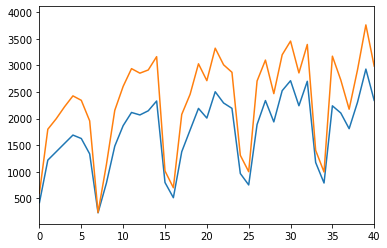

In [4]:
plt.plot(df.mu_10)
plt.plot(df.mu_20)
plt.xlim(0,40)

(array([4.5400e+02, 2.2013e+04, 1.8334e+04, 3.0390e+03, 2.6740e+03,
        1.8770e+03, 7.7200e+02, 1.6600e+02, 2.7000e+01, 4.0000e+00]),
 array([0.60442046, 0.70259881, 0.80077716, 0.89895551, 0.99713386,
        1.0953122 , 1.19349055, 1.2916689 , 1.38984725, 1.4880256 ,
        1.58620395]),
 <BarContainer object of 10 artists>)

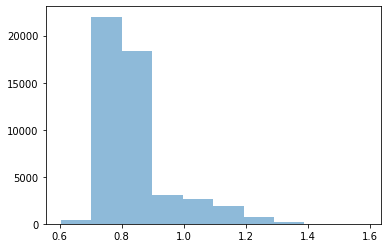

In [5]:
plt.hist(df.mu_10 / df.mu_20, alpha=0.5) #alpha is the transparency
# plt.hist(df.mu_20, alpha=0.5)

In [6]:
df.E_0.mean()

1.980624096991483

In [7]:
df.T_0.mean()

2501.5114003246017

In [8]:
df.E_0[df.E_0 < 1e5].mean()

1.980624096991483

(array([1.7000e+01, 9.0400e+02, 5.4150e+03, 1.6975e+04, 1.3568e+04,
        4.0960e+03, 1.5140e+03, 1.3990e+03, 1.3450e+03, 1.3020e+03,
        1.0450e+03, 7.9500e+02, 4.6600e+02, 3.0600e+02, 1.2800e+02,
        5.2000e+01, 2.1000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([2181.76881305, 2248.83030962, 2315.89180619, 2382.95330276,
        2450.01479933, 2517.0762959 , 2584.13779247, 2651.19928904,
        2718.26078561, 2785.32228218, 2852.38377875, 2919.44527532,
        2986.50677189, 3053.56826846, 3120.62976503, 3187.6912616 ,
        3254.75275817, 3321.81425474, 3388.87575131, 3455.93724788,
        3522.99874445]),
 <BarContainer object of 20 artists>)

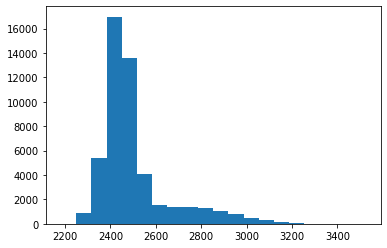

In [9]:
plt.hist(df.T_0, bins=20)

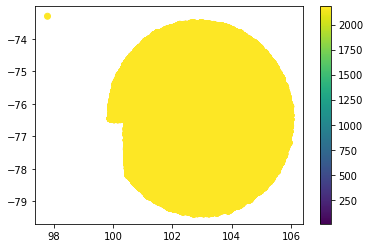

In [10]:
plt.scatter(df.x_pos, df.y_pos, c=df.T_0, vmax=10)
plt.colorbar()

In [11]:
df[['x_pos', 'y_pos']]

,x_pos,y_pos
0,97.797553,-73.305715
1,100.203477,-75.107056
2,100.211309,-75.109707
3,100.218030,-75.114616
4,100.224126,-75.118654
...,...,...
49395,105.907017,-77.161475
49396,105.907037,-77.156768
49397,105.910931,-77.152736
49398,105.914989,-77.152125


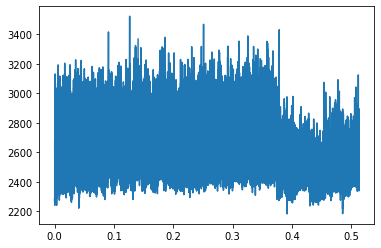

In [12]:
#Laser power = diode*200watts
#plt.plot(df.time, df.diode*200)
plt.plot(df.time, df.T_0)

# load centroids

In [13]:
pth = './layer8/weighted_centroids_diode_aligned.npy'
d = np.load(pth, allow_pickle=True).item()

In [14]:
d.keys()

dict_keys(['laserdata', 'c1_c2_centroid', 'c1_c2_max', 'c1_c2_area', 'c1_bb_xywh', 'c2_bb_xywh', 'thresholds_c1_c2', 'filter_result', 'time', 'x_pos', 'y_pos', 'diode'])

In [15]:
d['c2_bb_xywh']

array([[128.5,  87.5,   3.5,   4.5],
       [126.5,  86.5,   6.5,   6.5],
       [126.5,  86. ,   6.5,   7. ],
       ...,
       [  nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan]])

In [16]:
centroid = d['c1_c2_centroid']
centroid = np.nan_to_num(centroid[:49400,:])
print(centroid[0])

[144.0428333  110.05752469 130.25450313  89.75613252]


# Load single image and plot centroid

In [17]:
!pip install hdf5storage

In [77]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import hdf5storage
import cv2
from pprint import pprint
from scipy.io import loadmat
from scipy.io import savemat

In [70]:
pth = './layer8/rawdataALLFRAMES.mat'

#this is just for element 1000 for now
idx = 500

with h5py.File(pth, 'r') as h:
    print(h.keys())
    c1 = h['cam1'][idx][:] #camera 1
    c2 = np.fliplr(h['cam2'][idx][:]) #camera 2
    im = h['end_frame'][:]
print(im)

<KeysViewHDF5 ['#refs#', 'cam1', 'cam2', 'end_frame', 'imagedata', 'laserdata']>
[[58001.]]


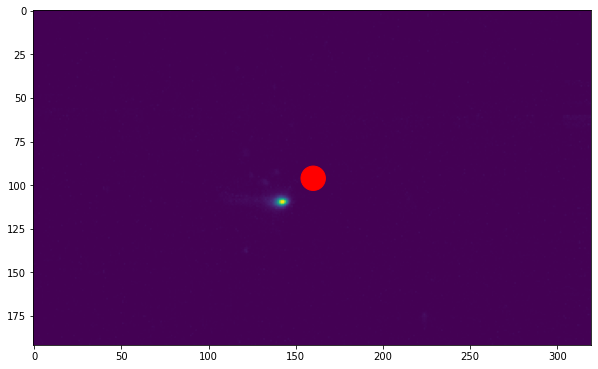

In [86]:
f, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(c1)
circle1 = plt.Circle((160, 96), 7, color='r')
ax.add_patch(circle1)
#ax[1].imshow(c2)
#plt.imsave('frame500_c1.png', c1)

In [76]:
import cv2

# Read image
im = cv2.imread("frame500_c1.png", cv2.IMREAD_GRAYSCALE)
# Invert the image from black to white and vice versa
im = cv2.bitwise_not(im)

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [78]:
for keyPoint in keypoints:
    s = keyPoint.size

print(s)
#convert pixels to mm
m = s*20*10**(-3)
print('Melt pool in mm:', m)

t = m/620
print('Time:', t)

f = 100000*t
print('Frames:', f)

7.745534896850586
Melt pool in mm: 0.15491069793701173
Time: 0.00024985596441453505
Frames: 24.985596441453506


# Transformation for loop

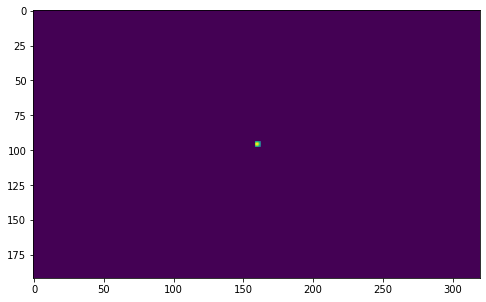

In [98]:
#Mark the center of the image
center_x = 160
center_y = 96

#Calculate discrepency between center of image and laser point
def delta(center_x, center_y, idx):
    delta_x1 = center_x - round(centroid[idx, 0])
    delta_y1 = center_y - round(centroid[idx, 1])
    delta_x2 = center_x - round(centroid[idx, 2])
    delta_y2 = center_y - round(centroid[idx, 3])
    return delta_x1, delta_y1, delta_x2, delta_y2

def transform(delta_x, delta_y, img):
    
    #translate vertical
    if delta_y == 0:
        img_new = img.copy()
    else:
        '''
        if delta_y > 0: #translate up
            delta_y = -delta_y
        '''
        temp = img[:-delta_y]
        img_new = img.copy()
        img_new[:delta_y] = img[-delta_y:]
        img_new[delta_y:] = temp
    
    #translate horizontal
    if delta_x == 0:
        img_new = img_new.copy()
    else:
        '''
        if delta_x > 0: 
            delta_x = -delta_x
            '''
        temp = img_new[:,-delta_x:]
        img_new[:,delta_x:] = img_new[:,:-delta_x]
        img_new[:,:delta_x] = temp
    
    return img_new

#Align images, calculate intensity ratio and save to .mat file
intensity_array = []
f, ax = plt.subplots(1,1,figsize=(8,8))


for idx in range(50, 51):
    with h5py.File(pth, 'r') as h:
        #print(h.keys())
        c1 = h['cam1'][idx][:] #camera 1
        c2 = np.fliplr(h['cam2'][idx][:]) #camera 2
    
    #Check if the image pixels are correct
    if c1.shape and c2.shape != (192, 320):
        continue
    
    #Check if there are values for the laser position
    if np.all(centroid[idx]) == False:
        continue
        
    delta_x1, delta_y1, delta_x2, delta_y2 = delta(center_x, center_y, idx)
    img_new1 = transform(delta_x1, delta_y1, c1)
    img_new2 = transform(delta_x2, delta_y2, c2)
    
    img_new1[:94,:] = 0
    img_new1[98:,:] = 0
    img_new1[:,:159] = 0
    img_new1[:,163:] = 0
    
    ax.imshow(img_new1)
    #ax[0,1].imshow(img_new2)

# circle1 = plt.Circle((160, 96), 2, color='r')
# ax.add_patch(circle1)



# load multiple images without using too much memory

In [ ]:
# load images
idx_0 = 1000
idx_1 = idx_0 + 100

h = h5py.File(pth, 'r')
c1 = h['cam1'][idx_0:idx_1][:]
c2 = np.flip(h['cam2'][idx_0:idx_1][:], axis=2)


<KeysViewHDF5 ['#refs#', 'cam1', 'cam2', 'end_frame', 'imagedata', 'laserdata']>


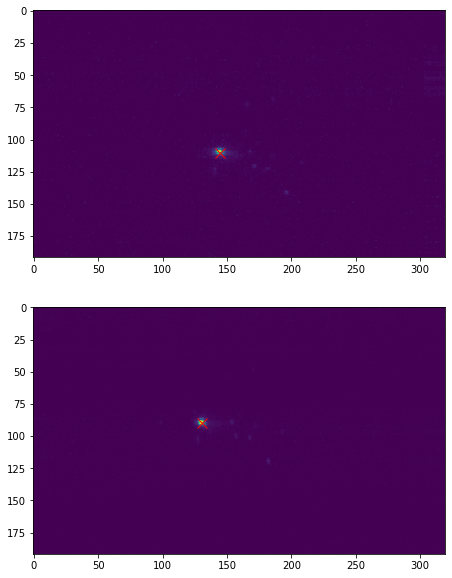

In [ ]:
# do some stuff
f, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].imshow(c1[0])
ax[1].imshow(c2[0])

ax[0].plot(d['c1_c2_centroid'][idx_0, 0], d['c1_c2_centroid'][idx_0, 1], 'rx', ms=10)
ax[1].plot(d['c1_c2_centroid'][idx_0, 2], d['c1_c2_centroid'][idx_0, 3], 'rx', ms=10)

In [ ]:
# close file
h.close()